In [1]:
# Import the operating system and python libraries for data cleaning and visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [72]:
# Import csv data from local repository 
music=pd.read_csv ("music.csv")

# Check if data was successfully imported
music

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [73]:
# Summary Statistics of Data
music.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


<AxesSubplot:>

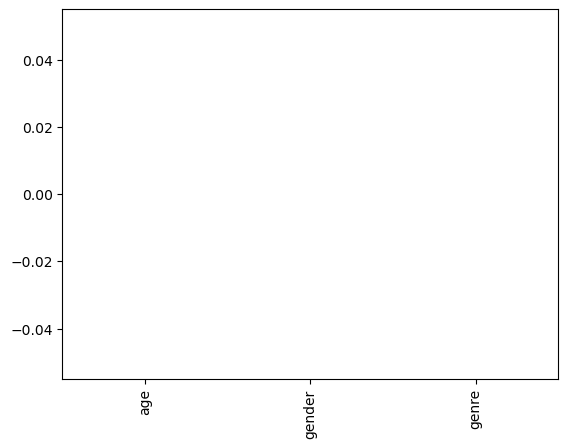

In [74]:
# Check if there are NaN values
music.isna().sum().plot(kind='bar')

In [75]:
# Import the algorithm Decision Tree from scikit-learn
from sklearn.tree import DecisionTreeClassifier

In [81]:
# Split the car data in features X and results y for Machine Learning
X = music.drop(columns= ['genre'])
y = music['genre']

In [82]:
# Split X and y in train and test data using train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Create the model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [83]:
# Get the predictions 
predictions= model.predict(X_test)

In [84]:
predictions

array(['Classical', 'Classical', 'Jazz', 'Dance'], dtype=object)

In [85]:
# Comparison of actual and predicted MSRP
Result=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
Result

,Actual,Predicted
6,Classical,Classical
7,Classical,Classical
5,Jazz,Jazz
12,Acoustic,Dance


In [86]:
# Import and run the accuracy score
from sklearn.metrics import accuracy_score 
score = accuracy_score(y_test, predictions) 
print(score)



0.75


In [87]:
# Let us create the Decision Tree graph
from sklearn import tree 
tree.export_graphviz(model, out_file='music.dot', feature_names=['age', 'gender'], class_names=sorted(y.unique()), label='all', rounded=True, filled=True)